In [27]:
import datetime
from datetime import date

import numpy as np
import pandas as pd
import pandas_datareader.data as web

'''pandas_datareader.data module is a part of the pandas_datareader library,
     which is used for retrieving financial and economic data from various online sources.
'''
import seaborn as sns
from matplotlib import pyplot as plt


import yfinance as yfin
yfin.pdr_override()

from scipy import stats
#'''overrides all the other data sources no need to specify the source'''

## Pulling Data

In [2]:
start= datetime.date.today()-datetime.timedelta(days=5*365)
end=datetime.date.today()

#timedelta is used to specify the duration of time

In [3]:
df= web.DataReader(["TCS.NS","LT.NS","ICICIBANK.NS"],start,end)["Adj Close"]
df

[*********************100%***********************]  3 of 3 completed


,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-09,263.354279,1175.618042,1691.245483
2018-07-10,265.490662,1172.514526,1684.149658
2018-07-11,260.975159,1163.523926,1778.277710
2018-07-12,264.422455,1186.342896,1770.598633
2018-07-13,260.004120,1185.110596,1779.355347
...,...,...,...
2023-06-28,936.099976,2388.050049,3197.350098
2023-06-30,934.599976,2475.550049,3302.250000
2023-07-03,942.549988,2454.050049,3272.300049


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2018-07-09 to 2023-07-05
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ICICIBANK.NS  1232 non-null   float64
 1   LT.NS         1232 non-null   float64
 2   TCS.NS        1232 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [5]:
df.describe()

,ICICIBANK.NS,LT.NS,TCS.NS
count,1232.000000,1232.000000,1232.000000
mean,580.956903,1474.492933,2620.192701
std,207.869516,411.922235,678.193106
min,251.750031,672.131714,1538.805054
25%,382.813263,1216.622925,1931.127747
50%,538.655884,1369.155090,2824.141357
75%,749.216461,1784.754456,3218.946838
max,958.000000,2475.550049,3857.103760


## Price Chart & Return Calculation

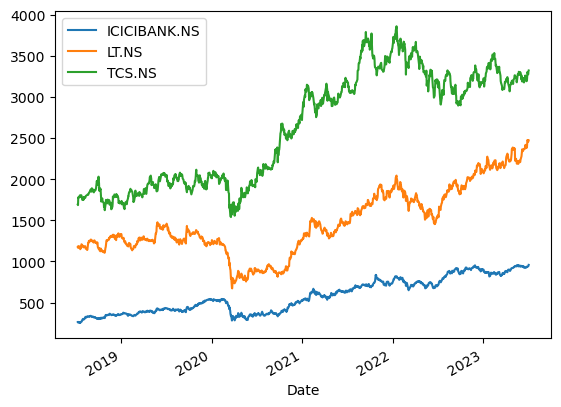

In [6]:
df.plot();

In [7]:
##Return Calculation

df["ICICIBANK"]=np.log(df["ICICIBANK.NS"])-np.log(df["ICICIBANK.NS"].shift(1))
df["LT"]=np.log(df["LT.NS"])-np.log(df["LT.NS"].shift(1))
df["TCS"]=np.log(df["TCS.NS"])-np.log(df["TCS.NS"].shift(1))


#.shift()  gives the value at the previous day

#Advantage of log return is that they are additive in nature

In [8]:
ret= df.iloc[1:,3:]

#removing the first row because the return can;t be calculated for this and keeping only return columns

In [9]:
ret.describe()

,ICICIBANK,LT,TCS
count,1231.000000,1231.000000,1231.000000
mean,0.001049,0.000603,0.000548
std,0.021538,0.017972,0.016014
min,-0.196597,-0.177522,-0.098830
25%,-0.009547,-0.008581,-0.007394
50%,0.000813,0.000276,0.000643
75%,0.011253,0.009359,0.008889
max,0.128942,0.090162,0.093901


In [10]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1231 entries, 2018-07-10 to 2023-07-05
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ICICIBANK  1231 non-null   float64
 1   LT         1231 non-null   float64
 2   TCS        1231 non-null   float64
dtypes: float64(3)
memory usage: 38.5 KB


In [11]:
#Calculating Annual return

((ret.mean()+1).pow(365)-1)*100

ICICIBANK    46.622751
LT           24.628048
TCS          22.132280
dtype: float64

## Volatility

In [12]:
band= df.max()-df.min()
band

ICICIBANK.NS     706.249969
LT.NS           1803.418335
TCS.NS          2318.298706
ICICIBANK          0.325539
LT                 0.267685
TCS                0.192731
dtype: float64

In [13]:
currYear= df.loc[date.today()-datetime.timedelta(365):date.today()]
currYear.max()-currYear.min()


# .loc label based indexing like in this case date
#.iloc integer based indexing like in previous case of log return

ICICIBANK.NS    236.380432
LT.NS           939.076050
TCS.NS          638.006836
ICICIBANK         0.081656
LT                0.099412
TCS               0.082514
dtype: float64

## Moving Avergae

<AxesSubplot:xlabel='Date', ylabel='ICICIBANK.NS'>

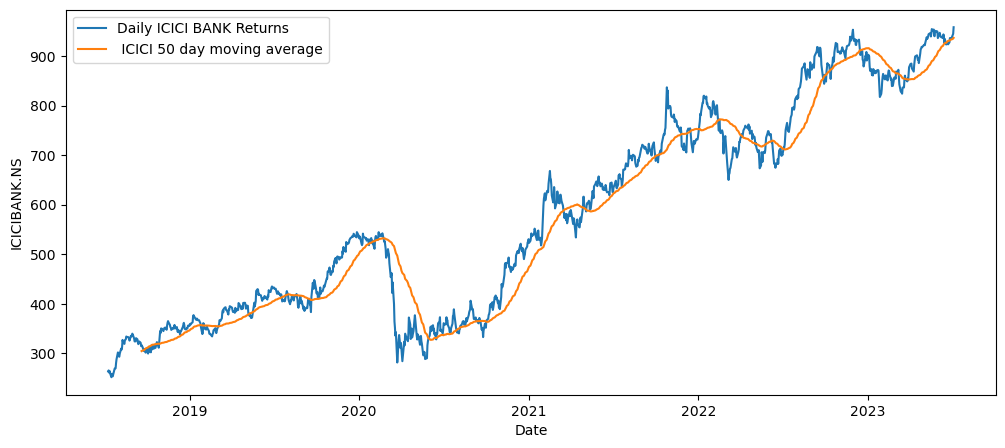

In [14]:
# 50 day moving average

df["ICICI_50_day"]=df["ICICIBANK.NS"].rolling(50).mean()

plt.figure(figsize=(12,5))

sns.lineplot(
    x="Date",y="ICICIBANK.NS", data=df, label= "Daily ICICI BANK Returns"
)

sns.lineplot(
    x="Date", y="ICICI_50_day", data= df, label=" ICICI 50 day moving average"
)

.rolling(50): Creates a rolling window of size 50. This means that for each element in the "ICICIBANK.NS" column, it considers the current value along with the preceding 49 values to calculate the rolling mean.

Creates 49 empty enteries

In [15]:
# 50 day Rolling distance
#Distance between 50 day rolling average and that they price

((abs(df.iloc[:,:3]-df.iloc[:,:3].rolling(50).mean()))/df.iloc[:,:3]).mean()

ICICIBANK.NS    0.059884
LT.NS           0.060894
TCS.NS          0.042385
dtype: float64

In [16]:
df.iloc[:,:3]

,ICICIBANK.NS,LT.NS,TCS.NS
Date,,,
2018-07-09,263.354279,1175.618042,1691.245483
2018-07-10,265.490662,1172.514526,1684.149658
2018-07-11,260.975159,1163.523926,1778.277710
2018-07-12,264.422455,1186.342896,1770.598633
2018-07-13,260.004120,1185.110596,1779.355347
...,...,...,...
2023-06-28,936.099976,2388.050049,3197.350098
2023-06-30,934.599976,2475.550049,3302.250000
2023-07-03,942.549988,2454.050049,3272.300049


## Combined Funciton for all of the above

In [17]:
def investCompare(starttime,endtime,tickers):
    
    #pull data
    prices= web.DataReader(list(tickers.keys()),starttime,endtime)["Adj Close"]
    prices=prices.rename(columns=tickers)
    
    #return
    ret= np.log(prices)-np.log(prices.shift(1))
    ret= ret.iloc[1:,:]
    
    #analysing last year data
    currYear= prices.loc[
        date.today()-datetime.timedelta(365):date.today()
    ]
    highlow= (currYear.max()-currYear.min())/prices.iloc[-1]
    highlow= pd.DataFrame(highlow,columns=["HighminusLow"])
    
    #Moving Average Volatility
    MA=pd.DataFrame(
        ((abs(prices-prices.rolling(50).mean()))/prices).mean(),
        columns=["MovingAverageVolatility"]
    )
    
    investments =pd.merge(highlow,MA,left_index=True,right_index=True)
    investments=pd.merge(
        investments,
        pd.DataFrame(100*ret.mean(),columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True   
    )
    
    return investments.round(3)
#Mean Absolute Percentage Deviation


This performs a merge operation between the investments DataFrame and the DataFrame containing the mean daily return percentages. The merge is based on the index of the DataFrames since left_index=True and right_index=True are specified.

The result of the merge operation is assigned back to the investments DataFrame, which now includes the "Daily Return Percentage" column from the merged DataFrame.

In [18]:
investCompare(
    start,
    end, 
    {"ICICIBANK.NS":"ICICIBANK","LT.NS":"LT","TCS.NS":"TCS"}
)

[*********************100%***********************]  3 of 3 completed


,HighminusLow,MovingAverageVolatility,Daily Return Percentage
ICICIBANK,0.247,0.060,0.105
LT,0.380,0.061,0.060
TCS,0.192,0.042,0.055


## Comparing and Contrasting Return on different asset class

#to use data from some other source api use web.datareader([  ],"Source(fred)",start,end)

df = web.DataReader(["sp500", "NASDAQCOM", "CBBTCUSD"], "fred", start, end)

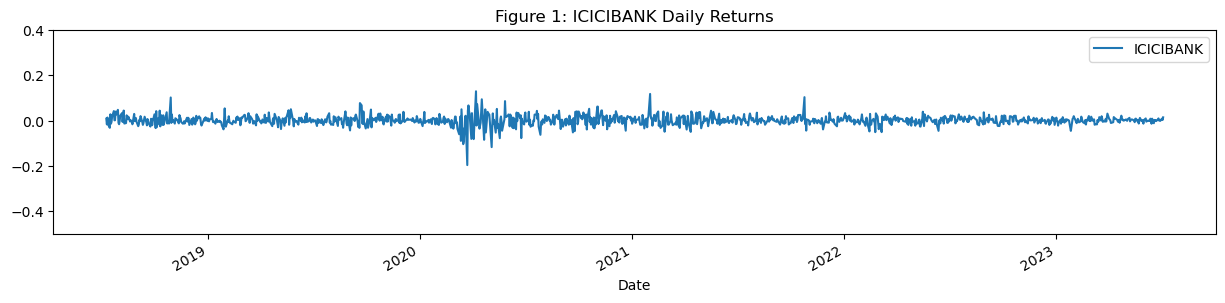

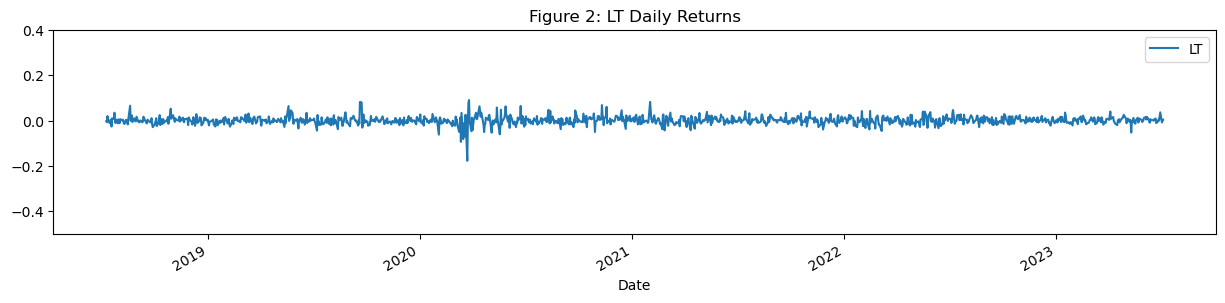

In [19]:
ax1 = ret.plot(figsize=(15, 3), y="ICICIBANK", title="Figure 1: ICICIBANK Daily Returns")
ax2 = ret.plot(figsize=(15, 3), y="LT", title="Figure 2: LT Daily Returns")

ax1.set_ylim(-0.5, 0.4)
ax2.set_ylim(-0.5, 0.4);

### Correlation

In [20]:
round(df.iloc[:,:3].corr(),3)

,ICICIBANK.NS,LT.NS,TCS.NS
ICICIBANK.NS,1.000,0.920,0.874
LT.NS,0.920,1.000,0.762
TCS.NS,0.874,0.762,1.000


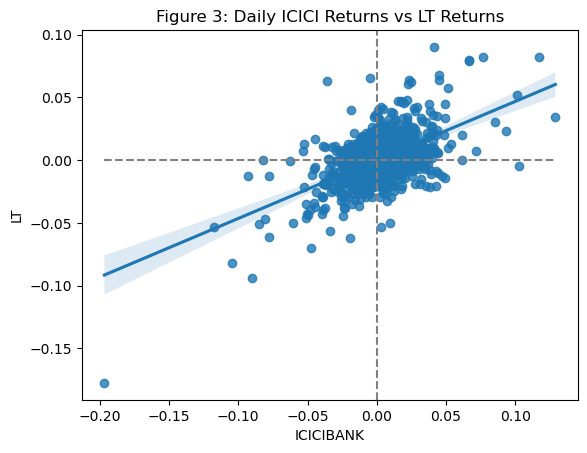

In [21]:
#sns.regplot create a scatter plot with a regression line


chart = sns.regplot(x="ICICIBANK", y="LT", data=ret).set(
    title="Figure 3: Daily ICICI Returns vs LT Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.ICICIBANK), max(ret.ICICIBANK)], [0, 0], linestyle="--", color="grey");

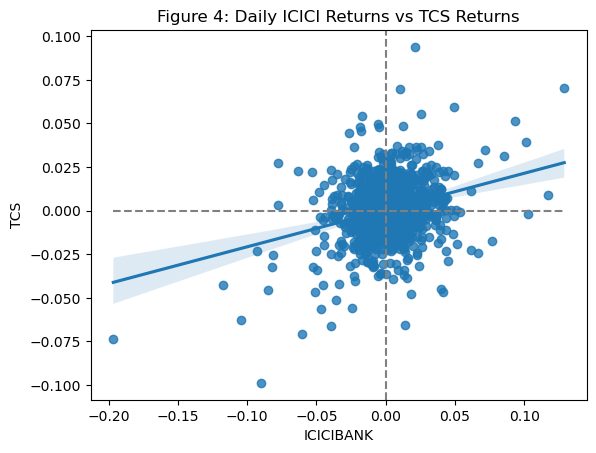

In [22]:
chart = sns.regplot(x="ICICIBANK", y="TCS", data=ret).set(
    title="Figure 4: Daily ICICI Returns vs TCS Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.ICICIBANK), max(ret.ICICIBANK)], [0, 0], linestyle="--", color="grey");

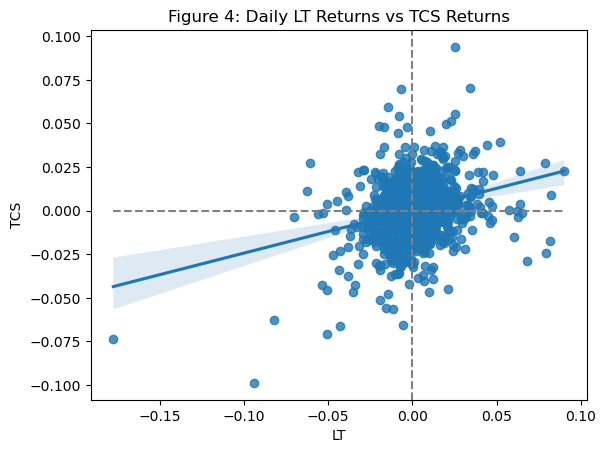

In [23]:
chart = sns.regplot(x="LT", y="TCS", data=ret).set(
    title="Figure 4: Daily LT Returns vs TCS Returns"
)

plt.axvline(0, 0, 1, dash_capstyle="butt", linestyle="--", color="grey")
plt.plot([min(ret.LT), max(ret.LT)], [0, 0], linestyle="--", color="grey");

The Scattering in the above graph shows the degree of correlation

### Sharpe Ratio

In [24]:
Sharpe_Ratio= ret.mean()/ret.std()
Sharpe_Ratio

ICICIBANK    0.048707
LT           0.033572
TCS          0.034215
dtype: float64

Sharpe Ratio utilises the standard deviation as the measure of risk.

Standard Deviation considers both the upside and the downside risk of investment but unless if the instrument is short no one really bother sabout the upside risk.

Because of this their is not much point in penalising the sharpe ratio of upside risk.

**Semivariance** takes into consideration only the downside risk.

Semivariance of variance of return that are less than the average.

Thus semivariance uses either the positive or negative return based on whethe r the instrument is long or short.

In [25]:
retmean= ret.mean()
ret_semivariance= ((ret[ret<retmean]-retmean)**2).mean()
ret_semivariance

ICICIBANK    0.000477
LT           0.000317
TCS          0.000268
dtype: float64

In [26]:
ret.std()

ICICIBANK    0.021538
LT           0.017972
TCS          0.016014
dtype: float64

## Statistical Distribution

**Symmetric Nature**
determine data points on either side of the mean

In [32]:
(len(df[df["LT.NS"] > df["LT.NS"].mean()])) / (len(df))

0.42045454545454547

42% data point greater than the mean slightly positive skew

**Constant Volatility Check**
ploting rolling average of the standard deviation

<Figure size 1200x500 with 0 Axes>

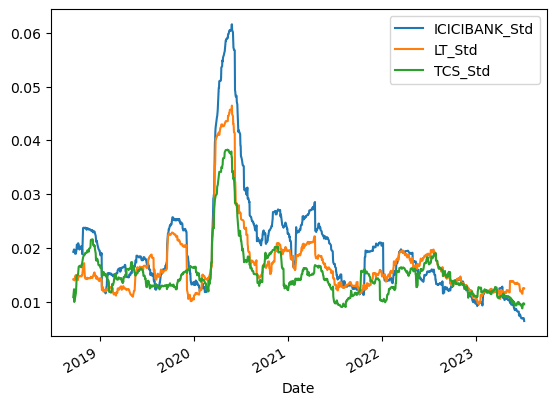

In [35]:
vols=pd.DataFrame(ret.rolling(50).std()).rename(columns={"ICICIBANK":"ICICIBANK_Std","LT":"LT_Std","TCS":"TCS_Std"})

plt.figure(figsize=(12,5))
vols.plot();

Volatility is not constant in any of the above case.

**Normal Distribution Check**

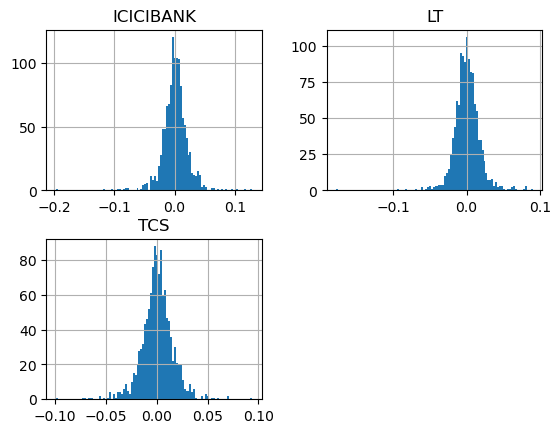

In [45]:
#Histogram- increasing the number of bins increases the noise
ret.iloc[:,:3].hist(bins=100);

In [47]:
#Noramlity test
stats.normaltest((np.array(ret)))


NormaltestResult(statistic=array([279.18293679, 282.72204417, 134.43148049]), pvalue=array([2.37791078e-61, 4.05217463e-62, 6.43539063e-30]))

Normal Test- This method uses D'Agostino and Pearson's normality test, which combines skew and kurtosis to produce an omnibus test of normality.
The null hypothesis of this test is that the sample data fits a normal distribution. 

**Skewness and Kurtosis** 

Jarques-Bera Test
The test statistic will always be greater than zero. In the context of the Jarque-Bera test, the null hypothesis assumes that the data follows a normal distribution. A low p-value suggests that there is strong evidence to reject the null hypothesis, indicating that the data is not normally distributed.



In [53]:
stats.jarque_bera((np.array(ret.ICICIBANK))).pvalue

0.0

In [54]:
stats.jarque_bera((np.array(ret.LT))).pvalue

0.0

In [55]:
stats.jarque_bera((np.array(ret.TCS))).pvalue

0.0

Even though the histogram suggested that the data distribution might be normal the pvalue suggest against it.

This could primarly be due to the Fat tails implying that the Extreme events are very likely.